# **Funciones**

In [1]:
# =============================================================================
# Configuración optimizada de la sesión de Spark
# =============================================================================
# Esta configuración es más robusta para conjuntos de datos grandes.
# Debe ejecutarse una vez al inicio del notebook.

from pyspark.sql import SparkSession
import os

spark = SparkSession.builder \
    .appName("BlueBikes-Project") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .config("spark.sql.shuffle.partitions", "200") \
    .config("spark.network.timeout", "800s") \
    .config("spark.executor.heartbeatInterval", "60s") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.driver.maxResultSize", "2g") \
    .getOrCreate()

# Establecer variables de entorno para que PySpark funcione correctamente en algunos entornos
import sys
# os.environ["PYSPARK_PYTHON"] = sys.executable
# os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable
os.environ["PYSPARK_PYTHON"] = "python"
os.environ["PYSPARK_DRIVER_PYTHON"] = "python"

In [2]:
import requests, os, zipfile
from io import BytesIO

def download_and_extract_zip():
# URL base y carpeta de salida
    base_url = "https://s3.amazonaws.com/hubway-data/"
    output_folder = "hubway_csv"
    os.makedirs(output_folder, exist_ok=True)


    zip_files = [
        "201501-hubway-tripdata.zip","201502-hubway-tripdata.zip","201503-hubway-tripdata.zip","201504-hubway-tripdata.zip",
        "201505-hubway-tripdata.zip","201506-hubway-tripdata.zip","201507-hubway-tripdata.zip","201508-hubway-tripdata.zip",
        "201509-hubway-tripdata.zip","201510-hubway-tripdata.zip","201511-hubway-tripdata.zip","201512-hubway-tripdata.zip",
        "201601-hubway-tripdata.zip","201602-hubway-tripdata.zip","201603-hubway-tripdata.zip","201604-hubway-tripdata.zip",
        "201605-hubway-tripdata.zip","201606-hubway-tripdata.zip","201607-hubway-tripdata.zip","201608-hubway-tripdata.zip",
        "201609-hubway-tripdata.zip","201610-hubway-tripdata.zip","201611-hubway-tripdata.zip","201612-hubway-tripdata.zip",
        "201701-hubway-tripdata.zip","201702-hubway-tripdata.zip","201703-hubway-tripdata.zip","201704-hubway-tripdata.zip",
        "201705-hubway-tripdata.zip","201706-hubway-tripdata.zip","201707-hubway-tripdata.zip","201708-hubway-tripdata.zip",
        "201709-hubway-tripdata.zip","201710-hubway-tripdata.zip","201711-hubway-tripdata.zip","201712-hubway-tripdata.zip",
        "201801-hubway-tripdata.zip","201802-hubway-tripdata.zip","201803-hubway-tripdata.zip","201804-hubway-tripdata.zip",
        "201805-bluebikes-tripdata.zip","201806-bluebikes-tripdata.zip","201807-bluebikes-tripdata.zip",
        "201808-bluebikes-tripdata.zip","201809-bluebikes-tripdata.zip","201810-bluebikes-tripdata.zip",
        "201811-bluebikes-tripdata.zip","201812-bluebikes-tripdata.zip","201901-bluebikes-tripdata.zip",
        "201902-bluebikes-tripdata.zip","201903-bluebikes-tripdata.zip","201904-bluebikes-tripdata.zip",
        "201905-bluebikes-tripdata.zip","201906-bluebikes-tripdata.zip","201907-bluebikes-tripdata.zip",
        "201908-bluebikes-tripdata.zip","201909-bluebikes-tripdata.zip","201910-bluebikes-tripdata.zip",
        "201911-bluebikes-tripdata.zip","201912-bluebikes-tripdata.zip","202001-bluebikes-tripdata.zip",
        "202002-bluebikes-tripdata.zip","202003-bluebikes-tripdata.zip","202004-bluebikes-tripdata.zip",
        "202005-bluebikes-tripdata.zip","202006-bluebikes-tripdata.zip","202007-bluebikes-tripdata.zip",
        "202008-bluebikes-tripdata.zip","202009-bluebikes-tripdata.zip","202010-bluebikes-tripdata.zip",
        "202011-bluebikes-tripdata.zip","202012-bluebikes-tripdata.zip","202101-bluebikes-tripdata.zip",
        "202102-bluebikes-tripdata.zip","202103-bluebikes-tripdata.zip","202104-bluebikes-tripdata.zip",
        "202105-bluebikes-tripdata.zip","202106-bluebikes-tripdata.zip","202107-bluebikes-tripdata.zip",
        "202108-bluebikes-tripdata.zip","202109-bluebikes-tripdata.zip","202110-bluebikes-tripdata.zip",
        "202111-bluebikes-tripdata.zip","202112-bluebikes-tripdata.zip","202201-bluebikes-tripdata.zip",
        "202202-bluebikes-tripdata.zip","202203-bluebikes-tripdata.zip","202204-bluebikes-tripdata.zip",
        "202205-bluebikes-tripdata.zip","202206-bluebikes-tripdata.zip","202207-bluebikes-tripdata.zip",
        "202208-bluebikes-tripdata.zip","202209-bluebikes-tripdata.zip","202210-bluebikes-tripdata.zip",
        "202211-bluebikes-tripdata.zip","202212-bluebikes-tripdata.zip","202301-bluebikes-tripdata.zip",
        "202302-bluebikes-tripdata.zip","202303-bluebikes-tripdata.zip","202304-bluebikes-tripdata.zip",
        "202305-bluebikes-tripdata.zip","202306-bluebikes-tripdata.zip","202307-bluebikes-tripdata.zip",
        "202308-bluebikes-tripdata.zip","202309-bluebikes-tripdata.zip","202310-bluebikes-tripdata.zip",
        "202311-bluebikes-tripdata.zip","202312-bluebikes-tripdata.zip","202401-bluebikes-tripdata.zip",
        "202402-bluebikes-tripdata.zip","202403-bluebikes-tripdata.zip","202404-bluebikes-tripdata.zip",
        "202405-bluebikes-tripdata.zip","202406-bluebikes-tripdata.zip","202407-bluebikes-tripdata.zip",
        "202408-bluebikes-tripdata.zip","202409-bluebikes-tripdata.zip","202410-bluebikes-tripdata.zip",
        "202411-bluebikes-tripdata.zip","202412-bluebikes-tripdata.zip","202501-bluebikes-tripdata.zip",
        "202502-bluebikes-tripdata.zip","202503-bluebikes-tripdata.zip","202504-bluebikes-tripdata.zip",
        "202505-bluebikes-tripdata.zip","202506-bluebikes-tripdata.zip"
    ]

    for zip_name in zip_files:
        # Asignamos nombre del ZIP
        zip_path = os.path.join(output_folder, zip_name)

        # Descargar el archivo ZIP
        file_url = base_url + zip_name

        r = requests.get(file_url)
        if r.status_code != 200:

            continue

        with zipfile.ZipFile(BytesIO(r.content)) as z:
            # Buscar el primer archivo CSV dentro del ZIP
            csv_files = [f for f in z.namelist() if f.lower().endswith(".csv")]
            if not csv_files:

                continue

            csv_file = csv_files[0]  # Tomar el primero
            csv_name = os.path.basename(csv_file)
            csv_path = os.path.join(output_folder, csv_name)

            if os.path.exists(csv_path):

                continue

            print(f"Extrayendo: {csv_name}")
            with z.open(csv_file) as src, open(csv_path, "wb") as dst:
                dst.write(src.read())

    print("✅ Descarga y extracción finalizada.")

import zipfile
import pandas as pd
def check_schema_consistency(folder_path="hubway_csv"):
    esquemas = {}

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path, nrows=5)
                columnas = tuple(df.columns)

                if columnas not in esquemas:
                    esquemas[columnas] = []
                esquemas[columnas].append(file)
            except Exception as e:
                print(f"❌ Error leyendo {file}: {e}")

    for i, (cols, archivos) in enumerate(esquemas.items(), 1):
        print(f"\n🔹 Esquema {i}: {len(archivos)} archivos")
        print("Columnas:", list(cols))
        print("Ejemplos:", archivos[:5], "...")

import os
import pandas as pd
import re


import os
import re
import pandas as pd

from pyspark.sql.functions import col, lit, when, to_timestamp, unix_timestamp

from pyspark.sql.functions import col, lit, when, to_timestamp, unix_timestamp

from pyspark.sql.functions import col, lit, to_timestamp, when, lower, unix_timestamp

def estandarizar_schema_spark(df, schema, periodo):
    if schema == "schema1":
        df_std = df \
            .withColumnRenamed("bikeid", "ride_id") \
            .withColumn("rideable_type", lit(None).cast("string")) \
            .withColumnRenamed("starttime", "started_at") \
            .withColumnRenamed("stoptime", "ended_at") \
            .withColumnRenamed("start station id", "start_station_id") \
            .withColumnRenamed("start station name", "start_station_name") \
            .withColumnRenamed("start station latitude", "start_lat") \
            .withColumnRenamed("start station longitude", "start_lng") \
            .withColumnRenamed("end station id", "end_station_id") \
            .withColumnRenamed("end station name", "end_station_name") \
            .withColumnRenamed("end station latitude", "end_lat") \
            .withColumnRenamed("end station longitude", "end_lng") \
            .withColumn("member_casual", when(col("usertype") == "Customer", "casual")
                        .when(col("usertype") == "Subscriber", "member")
                        .otherwise(col("usertype"))) \
            .withColumnRenamed("tripduration", "duration_sec") \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", col("birth year").cast("int")) \
            .withColumn("gender", col("gender").cast("int")) \
            .withColumn("postal_code", lit(None).cast("string")) \
            .withColumn("periodo", lit(periodo))

    elif schema == "schema3":
        df_std = df \
            .withColumnRenamed("bikeid", "ride_id") \
            .withColumn("rideable_type", lit(None).cast("string")) \
            .withColumnRenamed("starttime", "started_at") \
            .withColumnRenamed("stoptime", "ended_at") \
            .withColumnRenamed("start station id", "start_station_id") \
            .withColumnRenamed("start station name", "start_station_name") \
            .withColumnRenamed("start station latitude", "start_lat") \
            .withColumnRenamed("start station longitude", "start_lng") \
            .withColumnRenamed("end station id", "end_station_id") \
            .withColumnRenamed("end station name", "end_station_name") \
            .withColumnRenamed("end station latitude", "end_lat") \
            .withColumnRenamed("end station longitude", "end_lng") \
            .withColumn("member_casual", when(col("usertype") == "Customer", "casual")
                        .when(col("usertype") == "Subscriber", "member")
                        .otherwise(col("usertype"))) \
            .withColumnRenamed("tripduration", "duration_sec") \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", lit(None).cast("int")) \
            .withColumn("gender", lit(None).cast("int")) \
            .withColumn("postal_code", col("postal code")) \
            .withColumn("periodo", lit(periodo))

    elif schema == "schema2":
        df_std = df \
            .withColumn("ride_id", col("ride_id")) \
            .withColumn("rideable_type", col("rideable_type")) \
            .withColumn("started_at", to_timestamp("started_at")) \
            .withColumn("ended_at", to_timestamp("ended_at")) \
            .withColumn("start_station_id", col("start_station_id")) \
            .withColumn("start_station_name", col("start_station_name")) \
            .withColumn("start_lat", col("start_lat").cast("double")) \
            .withColumn("start_lng", col("start_lng").cast("double")) \
            .withColumn("end_station_id", col("end_station_id")) \
            .withColumn("end_station_name", col("end_station_name")) \
            .withColumn("end_lat", col("end_lat").cast("double")) \
            .withColumn("end_lng", col("end_lng").cast("double")) \
            .withColumn("member_casual", lower(col("member_casual"))) \
            .withColumn("duration_sec", unix_timestamp("ended_at") - unix_timestamp("started_at")) \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", lit(None).cast("int")) \
            .withColumn("gender", lit(None).cast("int")) \
            .withColumn("postal_code", lit(None).cast("string")) \
            .withColumn("periodo", lit(periodo))

    else:
        raise ValueError(f"Esquema no reconocido: {schema}")

    return df_std.select(
        "ride_id", "rideable_type", "started_at", "ended_at",
        "start_station_id", "start_station_name", "start_lat", "start_lng",
        "end_station_id", "end_station_name", "end_lat", "end_lng",
        "member_casual", "duration_sec", "schema_version",
        "birth_year", "gender", "postal_code", "periodo"
    )

from pyspark.sql.functions import lower


def detectar_schema_spark(df):
    cols = [c.lower().strip() for c in df.columns]

    schema1 = {'tripduration', 'starttime', 'stoptime', 'start station id', 'start station name',
               'start station latitude', 'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'}

    schema3 = {'tripduration', 'starttime', 'stoptime', 'start station id', 'start station name',
               'start station latitude', 'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'postal code'}

    schema2 = {'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_id', 'start_station_name',
               'start_lat', 'start_lng', 'end_station_id', 'end_station_name', 'end_lat', 'end_lng', 'member_casual'}

    if set(cols) >= schema1:
        return 'schema1'
    elif set(cols) >= schema3:
        return 'schema3'
    elif set(cols) >= schema2:
        return 'schema2'
    else:
        return None



import os
import re

def cargar_datasets_unificados_spark(folder_path="hubway_csv"):
    dfs = []
    archivos_ok = []
    archivos_error = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            path = os.path.join(folder_path, file)
            try:
                df = spark.read.option("header", True).csv(path)
                schema = detectar_schema_spark(df)
                if schema:
                    match = re.search(r"(\d{6})", file)
                    periodo = match.group(1) if match else None
                    df_std = estandarizar_schema_spark(df, schema, periodo)
                    dfs.append(df_std)
                    archivos_ok.append(file)
            except Exception as e:
                archivos_error.append((file, str(e)))

    print(f"\n✅ Archivos unificados: {len(archivos_ok)}")
    print(f"❌ Archivos con error en estandarización: {len(archivos_error)}")

    if archivos_error:
        for file, err in archivos_error:
            print(f"- {file}: {err}")

    if dfs:
        df_final = dfs[0]
        for df in dfs[1:]:
            df_final = df_final.unionByName(df)

        total_registros = df_final.count()
        print(f"📊 Total de registros unificados: {total_registros}")

        return df_final
    else:
        print("⚠️ No se generó ningún DataFrame unificado.")
        return spark.createDataFrame([], schema="ride_id STRING")

# **Descargar BD Blue Bikes**

In [3]:
download_and_extract_zip()


Extrayendo: 201501-hubway-tripdata.csv
Extrayendo: 201502-hubway-tripdata.csv
Extrayendo: 201503-hubway-tripdata.csv
Extrayendo: 201504-hubway-tripdata.csv
Extrayendo: 201505-hubway-tripdata.csv
Extrayendo: 201506-hubway-tripdata.csv
Extrayendo: 201507-hubway-tripdata.csv
Extrayendo: 201508-hubway-tripdata.csv
Extrayendo: 201509-hubway-tripdata.csv
Extrayendo: 201510-hubway-tripdata.csv
Extrayendo: 201511-hubway-tripdata.csv
Extrayendo: 201512-hubway-tripdata.csv
Extrayendo: 201601-hubway-tripdata.csv
Extrayendo: 201602-hubway-tripdata.csv
Extrayendo: 201603-hubway-tripdata.csv
Extrayendo: 201604-hubway-tripdata.csv
Extrayendo: 201605-hubway-tripdata.csv
Extrayendo: 201606-hubway-tripdata.csv
Extrayendo: 201607-hubway-tripdata.csv
Extrayendo: 201608-hubway-tripdata.csv
Extrayendo: 201609-hubway-tripdata.csv
Extrayendo: 201610-hubway-tripdata.csv
Extrayendo: 201611-hubway-tripdata.csv
Extrayendo: 201612-hubway-tripdata.csv
Extrayendo: 201701-hubway-tripdata.csv
Extrayendo: 201702-hubway

In [4]:
check_schema_consistency()


🔹 Esquema 1: 64 archivos
Columnas: ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender']
Ejemplos: ['201712-hubway-tripdata.csv', '201506-hubway-tripdata.csv', '201610-hubway-tripdata.csv', '201611-hubway-tripdata.csv', '201704-hubway-tripdata.csv'] ...

🔹 Esquema 2: 35 archivos
Columnas: ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'postal code']
Ejemplos: ['202210-bluebikes-tripdata.csv', '202203-bluebikes-tripdata.csv', '202101-bluebikes-tripdata.csv', '202010-bluebikes-tripdata.csv', '202211-bluebikes-tripdata.csv'] ...

🔹 Esquema 3: 27 archivos
Columnas: ['ride_id', 'rid

In [5]:
import os

folder_path = "hubway_csv"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print(f"✅ Total de archivos CSV: {len(csv_files)}")


✅ Total de archivos CSV: 126


In [6]:
df_spark = cargar_datasets_unificados_spark("hubway_csv")


✅ Archivos unificados: 126
❌ Archivos con error en estandarización: 0
📊 Total de registros unificados: 27065610


In [7]:
from pyspark.sql.functions import min, max, count

df_spark.groupBy("schema_version") \
    .agg(
        min("periodo").alias("periodo_min"),
        max("periodo").alias("periodo_max"),
        count("*").alias("total_registros")
    ) \
    .orderBy("schema_version") \
    .show(truncate=False)


+--------------+-----------+-----------+---------------+
|schema_version|periodo_min|periodo_max|total_registros|
+--------------+-----------+-----------+---------------+
|schema1       |201501     |202004     |8379088        |
|schema2       |202304     |202506     |9845073        |
|schema3       |202005     |202303     |8841449        |
+--------------+-----------+-----------+---------------+



In [8]:
df_spark.show(5)

+-------+-------------+-------------------+-------------------+----------------+--------------------+-----------------+------------------+--------------+--------------------+-----------------+------------------+-------------+------------+--------------+----------+------+-----------+-------+
|ride_id|rideable_type|         started_at|           ended_at|start_station_id|  start_station_name|        start_lat|         start_lng|end_station_id|    end_station_name|          end_lat|           end_lng|member_casual|duration_sec|schema_version|birth_year|gender|postal_code|periodo|
+-------+-------------+-------------------+-------------------+----------------+--------------------+-----------------+------------------+--------------+--------------------+-----------------+------------------+-------------+------------+--------------+----------+------+-----------+-------+
|   1938|         NULL|2017-12-01 00:02:02|2017-12-01 00:05:22|             160|Wentworth Institu...|42.33758601097239|-71.0

In [9]:
df_spark.printSchema()

root
 |-- ride_id: string (nullable = true)
 |-- rideable_type: string (nullable = true)
 |-- started_at: string (nullable = true)
 |-- ended_at: string (nullable = true)
 |-- start_station_id: string (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_lat: string (nullable = true)
 |-- start_lng: string (nullable = true)
 |-- end_station_id: string (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_lat: string (nullable = true)
 |-- end_lng: string (nullable = true)
 |-- member_casual: string (nullable = true)
 |-- duration_sec: string (nullable = true)
 |-- schema_version: string (nullable = false)
 |-- birth_year: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- periodo: string (nullable = false)



In [10]:
from pyspark.sql.functions import col, to_timestamp

df_spark = df_spark \
    .withColumn("started_at", to_timestamp("started_at")) \
    .withColumn("ended_at", to_timestamp("ended_at")) \
    .withColumn("start_lat", col("start_lat").cast("double")) \
    .withColumn("start_lng", col("start_lng").cast("double")) \
    .withColumn("end_lat", col("end_lat").cast("double")) \
    .withColumn("end_lng", col("end_lng").cast("double")) \
    .withColumn("duration_sec", col("duration_sec").cast("double")) \
    .withColumn("birth_year", col("birth_year").cast("int")) \
    .withColumn("gender", col("gender").cast("int")) \
    .withColumn("postal_code", col("postal_code").cast("string"))  # opcional por consistencia

# Recalcular duración
from pyspark.sql.functions import unix_timestamp

df_spark = df_spark.withColumn(
    "duration_sec",
    unix_timestamp("ended_at") - unix_timestamp("started_at")
)


In [11]:
from pyspark.sql.functions import col, sum, when, isnan, count
from pyspark.sql.types import NumericType

# Total de registros
total_rows = df_spark.count()

# Identificar columnas por tipo
numeric_cols = [f.name for f in df_spark.schema.fields if isinstance(f.dataType, NumericType)]
other_cols = [f.name for f in df_spark.schema.fields if f.name not in numeric_cols]

# Armar expresiones seguras
null_counts_expr = []
for c in numeric_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c)
    )
for c in other_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | (col(c) == ""), 1).otherwise(0)).alias(c)
    )

# Obtener conteo de nulos
null_counts = df_spark.select(null_counts_expr).toPandas().T
null_counts.columns = ['nulos']
null_counts.index.name = 'columna'

# Calcular % de nulos
null_counts['% nulos'] = (null_counts['nulos'] / total_rows * 100).round(2)

# Mostrar ordenado por mayor % de nulos
null_counts = null_counts.sort_values('% nulos', ascending=False)

# Mostrar
import pandas as pd
from IPython.display import display
display(null_counts)



,nulos,% nulos
columna,,
birth_year,19377092,71.59
gender,18686522,69.04
postal_code,18253759,67.44
rideable_type,17220537,63.63
end_station_id,29036,0.11
end_station_name,28417,0.10
end_lat,21830,0.08
end_lng,21830,0.08
start_station_name,2033,0.01


# **Limpieza y pre-procesamiento**

In [12]:
columnas_a_eliminar = ["birth_year", "gender", "postal_code", "rideable_type"]

df_spark = df_spark.drop(*columnas_a_eliminar)


In [13]:
#los registros sin estación de inicio o fin pertenecen exclusivamente al schema2,
# lo cual sugiere que en los años más recientes ya no es obligatorio usar estaciones fijas para alquilar o devolver bicicleta
df_spark.filter(
    (col("start_station_id").isNull()) | (col("end_station_id").isNull())
).groupBy("schema_version").count().show()



+--------------+-----+
|schema_version|count|
+--------------+-----+
|       schema2|30447|
+--------------+-----+



In [14]:
from pyspark.sql.functions import when

df_spark = df_spark \
    .withColumn("start_station_name", when(col("start_station_name").isNull(), "Dockless start").otherwise(col("start_station_name"))) \
    .withColumn("end_station_name", when(col("end_station_name").isNull(), "Dockless end").otherwise(col("end_station_name")))


In [15]:
df_spark.filter(
    col("end_lat").isNull() | col("end_lng").isNull()
).groupBy("schema_version").count().show()


+--------------+-----+
|schema_version|count|
+--------------+-----+
|       schema2|21829|
|       schema1|    1|
+--------------+-----+



In [16]:
total_antes = df_spark.count()

# Reaplicar la limpieza
df_spark = df_spark.filter(
    col("end_lat").isNotNull() & col("end_lng").isNotNull()
)

total_despues = df_spark.count()
eliminados = total_antes - total_despues
print(f"🔎 Registros eliminados por falta de coordenadas finales: {eliminados}")



🔎 Registros eliminados por falta de coordenadas finales: 21830


In [17]:
from pyspark.sql.functions import col, sum, when, isnan, count
from pyspark.sql.types import NumericType

# Total de registros
total_rows = df_spark.count()

# Identificar columnas por tipo
numeric_cols = [f.name for f in df_spark.schema.fields if isinstance(f.dataType, NumericType)]
other_cols = [f.name for f in df_spark.schema.fields if f.name not in numeric_cols]

# Armar expresiones seguras
null_counts_expr = []
for c in numeric_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c)
    )
for c in other_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | (col(c) == ""), 1).otherwise(0)).alias(c)
    )

# Obtener conteo de nulos
null_counts = df_spark.select(null_counts_expr).toPandas().T
null_counts.columns = ['nulos']
null_counts.index.name = 'columna'

# Calcular % de nulos
null_counts['% nulos'] = (null_counts['nulos'] / total_rows * 100).round(2)

# Mostrar ordenado por mayor % de nulos
null_counts = null_counts.sort_values('% nulos', ascending=False)

# Mostrar
import pandas as pd
from IPython.display import display
display(null_counts)



,nulos,% nulos
columna,,
end_station_id,7207,0.03
start_station_id,2033,0.01
start_lat,0,0.00
end_lng,0,0.00
duration_sec,0,0.00
start_lng,0,0.00
end_lat,0,0.00
started_at,0,0.00
ride_id,0,0.00


In [18]:
from pyspark.sql.functions import col

df_spark = df_spark.filter(col("duration_sec") >= 60)


In [19]:
df_spark.select("duration_sec").describe().show()


+-------+-----------------+
|summary|     duration_sec|
+-------+-----------------+
|  count|         27003422|
|   mean|1507.280919099809|
| stddev|41582.36084533895|
|    min|               60|
|    max|         42563538|
+-------+-----------------+



In [20]:
from pyspark.sql.functions import col

# Eliminar registros con duraciones negativas de viaje
# La duración es en segundos, por lo que un valor negativo es un error.
print("Cantidad inicial de registros:", df_spark.count())
df_spark_cleaned = df_spark.filter(col("duration_sec") >= 0)
print("Cantidad de registros después de filtrar duraciones negativas:", df_spark_cleaned.count())

# Filtrar los viajes fuera de Boston
# Definir un cuadro delimitador razonable para las coordenadas de Boston
# Esta es una aproximación general y se puede ajustar
boston_lat_min, boston_lat_max = 42.22, 42.40
boston_lng_min, boston_lng_max = -71.20, -71.00

df_spark_cleaned = df_spark_cleaned.filter(
    (col("start_lat").between(boston_lat_min, boston_lat_max)) &
    (col("start_lng").between(boston_lng_min, boston_lng_max)) &
    (col("end_lat").between(boston_lat_min, boston_lat_max)) &
    (col("end_lng").between(boston_lng_min, boston_lng_max))
)

print("Cantidad de registros después del filtrado por las coordenadas de Boston:", df_spark_cleaned.count())
df_spark = df_spark_cleaned

Cantidad inicial de registros: 27003422
Cantidad de registros después de filtrar duraciones negativas: 27003422
Cantidad de registros después del filtrado por las coordenadas de Boston: 26436110


# **EDA**

Distribución inicial de la duración del viaje:


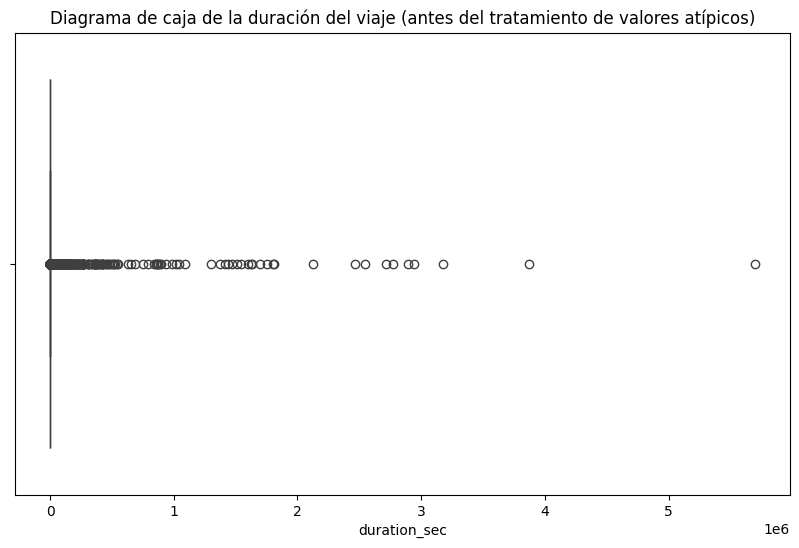

Recuento de viajes original: 26436110
Recuento de viajes después de eliminar los valores atípicos: 24567094

Distribución de la duración del viaje transformada en logaritmos:


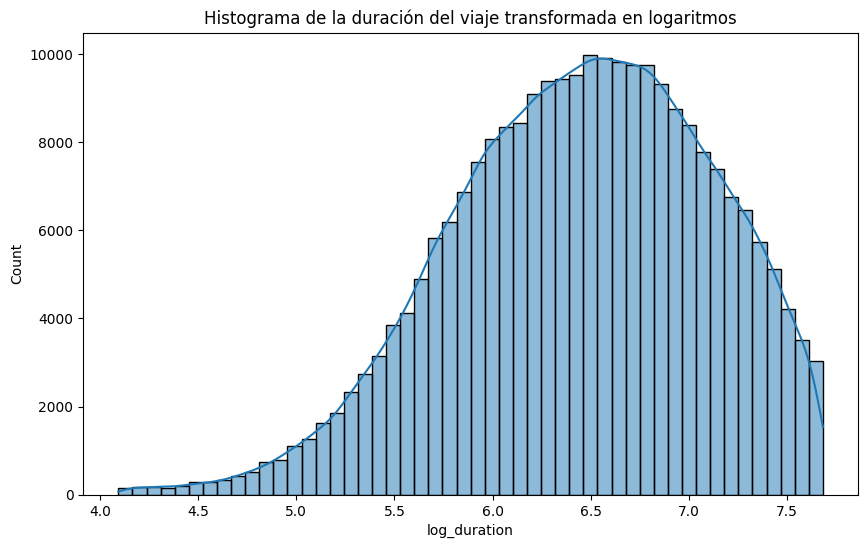

In [21]:
# =================================================================================
# Detección y tratamiento de valores atípicos
# =================================================================================
# Nos centraremos en 'duration_sec', ya que es una característica numérica clave.
# El filtrado IQR es un método robusto para la eliminación de valores atípicos, y la transformación logarítmica ayuda con los datos sesgados.

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, log, expr, stddev, mean
from pyspark.sql import Window
import numpy as np
import pandas as pd

# Visualizar la distribución de la duración del viaje (antes del tratamiento)
# Convertir una muestra a Pandas para su visualización
sample_df = df_spark.select('duration_sec').filter(col('duration_sec') >= 60).sample(False, 0.01, seed=42)
pd_sample = sample_df.toPandas()

print("Distribución inicial de la duración del viaje:")
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd_sample['duration_sec'])
plt.title('Diagrama de caja de la duración del viaje (antes del tratamiento de valores atípicos)')
plt.show()

# Calcular IQR para 'duration_sec'
quantiles = df_spark.approxQuantile('duration_sec', [0.25, 0.75], 0.05)
Q1, Q3 = quantiles[0], quantiles[1]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar valores atípicos mediante el método IQR
# Viajes de menos de 60 segundos ya se eliminaron, así que comenzaremos con eso.
df_no_outliers = df_spark.filter((col('duration_sec') >= 60) & (col('duration_sec') <= upper_bound))

print(f"Recuento de viajes original: {df_spark.count()}")
print(f"Recuento de viajes después de eliminar los valores atípicos: {df_no_outliers.count()}")

# Transforma logarítmicamente 'duration_sec' para normalizar su distribución
# La transformación logarítmica se aplica a los datos limpios.
df_cleaned_and_log_transformed = df_no_outliers.withColumn('log_duration', log(col('duration_sec')))

# Visualizar la duración transformada en logaritmos
pd_log_sample = df_cleaned_and_log_transformed.select('log_duration').sample(False, 0.01, seed=42).toPandas()
print("\nDistribución de la duración del viaje transformada en logaritmos:")
plt.figure(figsize=(10, 6))
sns.histplot(pd_log_sample['log_duration'], bins=50, kde=True)
plt.title('Histograma de la duración del viaje transformada en logaritmos')
plt.show()

# Actualizar el DataFrame principal que se utilizará en los próximos pasos
df_final = df_cleaned_and_log_transformed

In [22]:
# ==============================================================================
# Ingeniería de características temporales
# ==============================================================================
# Extraeremos varias características basadas en el tiempo de la marca de tiempo 'started_at'.
# Esto ayudará al modelo a capturar patrones relacionados con la hora del día, la semana y el año.

from pyspark.sql.functions import year, month, dayofweek, hour, dayofyear, weekofyear, when, sin, cos, radians, date_format

# Extraer características temporales básicas
df_with_temporal = df_final \
    .withColumn('trip_year', year(col('started_at'))) \
    .withColumn('trip_month', month(col('started_at'))) \
    .withColumn('trip_day_of_week', dayofweek(col('started_at'))) \
    .withColumn('trip_hour', hour(col('started_at'))) \
    .withColumn('is_weekend', when(col('trip_day_of_week').isin([1, 7]), 1).otherwise(0))

# Definir estaciones según los meses
df_with_temporal = df_with_temporal.withColumn(
    'season',
    when(col('trip_month').isin([12, 1, 2]), 'winter')
    .when(col('trip_month').isin([3, 4, 5]), 'spring')
    .when(col('trip_month').isin([6, 7, 8]), 'summer')
    .otherwise('fall')
)

# Codificar características cíclicas (hora y día de la semana) mediante transformaciones de seno y coseno.
# Esto ayuda al modelo a comprender la naturaleza continua del tiempo.
# Ciclo horario (24 horas)
df_with_temporal = df_with_temporal \
    .withColumn('hour_sin', sin(2 * np.pi * col('trip_hour') / 24)) \
    .withColumn('hour_cos', cos(2 * np.pi * col('trip_hour') / 24))

# Ciclo de día de la semana (7 días)
df_with_temporal = df_with_temporal \
    .withColumn('day_of_week_sin', sin(2 * np.pi * col('trip_day_of_week') / 7)) \
    .withColumn('day_of_week_cos', cos(2 * np.pi * col('trip_day_of_week') / 7))

# Actualizar el DataFrame principal
df_final = df_with_temporal

In [23]:
# ==============================================================================
# Ingeniería de características geoespaciales
# ==============================================================================
# Crearemos nuevas funciones basadas en las coordenadas de la estación para capturar patrones geoespaciales.
# La distancia de Haversine es una función clave para predecir la duración del viaje.
# También crearemos funciones relacionadas con la popularidad/densidad de la estación.

from pyspark.sql.functions import udf, lit, count
from pyspark.sql.types import DoubleType
from math import radians, sin, cos, sqrt, atan2

# Distancia de Haversina UDF
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0 # Radio de la Tierra en km

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

haversine_udf = udf(haversine, DoubleType())

# Calcular la distancia haversina entre las estaciones inicial y final
df_with_geospatial = df_final.withColumn(
    'haversine_distance_km',
    haversine_udf(
        col('start_lng'), col('start_lat'),
        col('end_lng'), col('end_lat')
    )
)

# Función: Calcular indicadores de "estación popular" según el historial de viajes.
# Definiremos una estación como popular si su total de viajes se encuentra en el 10% superior.
trip_counts_by_station = df_with_geospatial.groupBy('start_station_id').agg(count('*').alias('trip_count'))
percentile_threshold = trip_counts_by_station.approxQuantile('trip_count', [0.90], 0.05)[0]

popular_stations = trip_counts_by_station.filter(col('trip_count') > percentile_threshold) \
    .select('start_station_id').withColumn('is_popular_start', lit(1))

# Une el flag binario de la estación popular al DataFrame principal
df_with_geospatial = df_with_geospatial.join(
    popular_stations,
    on='start_station_id',
    how='left'
).fillna(0, subset=['is_popular_start'])

# Actualizar el DataFrame principal
df_final = df_with_geospatial

In [24]:
df_final.schema.names

['start_station_id',
 'ride_id',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_lat',
 'start_lng',
 'end_station_id',
 'end_station_name',
 'end_lat',
 'end_lng',
 'member_casual',
 'duration_sec',
 'schema_version',
 'periodo',
 'log_duration',
 'trip_year',
 'trip_month',
 'trip_day_of_week',
 'trip_hour',
 'is_weekend',
 'season',
 'hour_sin',
 'hour_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'haversine_distance_km',
 'is_popular_start']

# **Guardado de archivo**

In [26]:
# =============================================================================
# Guardar el DF procesado final en Parquet
# ==============================================================================
# Guardar el DataFrame limpio y con ingeniería de características en un archivo Parquet es un paso crucial.
# Conserva el trabajo, lo que  permite comenzar la fase de modelado en un cuaderno aparte sin tener que volver a ejecutar todo el proceso ETL.
# Esto ahorra mucho tiempo y recursos computacionales.

from pyspark.sql.functions import col

# --- Definir rutas locales y de Google Drive ---

# La ruta local guardará los datos en el mismo directorio que su notebook.
# local_path = "./df_final_bluebikes.parquet"

# La ruta de Google Drive requiere que primero montes tu unidad.
# Asegurar de crear una carpeta llamada 'DM_PRJ' o similar en el Drive.
gdrive_path = "/content/drive/MyDrive/DM_PRJ/df_final_bluebikes.parquet"

# --- Opción 1: Guardar el DataFrame localmente ---

# print(f"Intentando guardar DataFrame localmente en: {local_path}")
# try:
#     # Coalesce(1) combina el DataFrame distribuido en una sola partición antes de escribir.
#     # Esto genera un único archivo Parquet en lugar de un directorio con muchos archivos pequeños, lo cual facilita la gestión local.
#     # Usar esto con precaución con conjuntos de datos muy grandes, ya que puede causar problemas de memoria.
#     df_final.coalesce(1).write.mode("overwrite").parquet(local_path)

#     print(f"✅ DataFrame guardado correctamente localmente.")

# except Exception as e:
#     print(f"❌ Se produjo un error al guardar localmentey: {e}")


# --- Opción 2: Guardar DataFrame en Google Drive (para entornos Colab) ---

# Esta parte del código solo se ejecutará si detecta que está en un entorno de Google Colab.
try:
    from google.colab import drive

    print("\nIntentando montar Google Drive...")
    drive.mount('/content/drive')

    print(f"Intentando guardar DataFrame en Google Drive: {gdrive_path}")

    # Al escribir en un sistema de archivos distribuido como Google Drive,
    # suele ser mejor dejar que Spark administre las particiones.
    # No usaremos coalesce(1) aquí para mantener el paralelismo.
    df_final.write.mode("overwrite").parquet(gdrive_path)

    print(f"✅ DataFrame se guardó correctamente en Google Drive.")

except ImportError:
    # Esto se activará si no se encuentra 'google.colab',
    # lo que significa que probablemente se tiene un entorno local.
    print("\nOmitir el guardado de Google Drive: no se ejecuta en un entorno de Google Colab.")
except Exception as e:
    print(f"❌ Se produjo un error al guardar en Google Drive: {e}")

\nIntentando montar Google Drive...
Mounted at /content/drive
Intentando guardar DataFrame en Google Drive: /content/drive/MyDrive/DM_PRJ/df_final_bluebikes.parquet
✅ DataFrame se guardó correctamente en Google Drive.
